# Fitting an early MLE
In this notebook we will fit an early MLE model to audiovisual speech perception data.

In [1]:
import numpy as np
from glob import glob

import seaborn as sns
import matplotlib.pyplot as plt

from libfunc import to_table_body
import mle

# fuck off shitty warnings man
import warnings
warnings.filterwarnings('ignore')

## Prepare Data
The data consists of five text files, each containing seven rows and five columns, where:
- Row 1: Audiotorial data
- Row 2: Visual data
- Rows 3-7: Audiovisual data
    - a combination of rows 1 and 2
    - visual goes from 'b' (row 3) to 'd' (row 7) 
    - audio goes from 'b' (col 1) to 'd' (col 5)

In [2]:
# get paths to data files
file_paths = glob("./data/*.txt")

# load all data into a single array
data = np.array([np.loadtxt(fname) for fname in file_paths])
N, M, K = data.shape

# define number of samples for each subject
n_samples = 24 

## Fit MLE

In [3]:
# Perform early MLE fit for each subject
p_set = []
params = []
objective = []
for i in range(N):
    # initialize parameters
    theta = np.ones(4)

    # fit to subject data
    obj, c_A, c_V, std_A, std_V = mle.fit(theta, data[i], n_samples)

    #  compute probabilities
    p_A, p_V, p_AV = mle.compute_probs(c_A, c_V, np.exp(std_A), np.exp(std_V))
    
    # store results
    p_set.append(np.vstack([p_A, p_V, p_AV]))
    objective.append(np.round(obj, 2))
    params.append([c_A, std_A, c_V, std_V])

# print results
print(f'Negative log-likelihoods:\n{to_table_body(np.array([objective]).T)}')
print('\nParams')
print(to_table_body(params))

Negative log-likelihoods:
Subject 1 & 72.80\\
Subject 2 & 55.08\\
Subject 3 & 69.41\\
Subject 4 & 67.21\\
Subject 5 & 53.55

Params
Subject 1 & 3.31 & -0.10 & 1.86 & -0.13\\
Subject 2 & 3.02 & -0.27 & 1.98 & -0.53\\
Subject 3 & 2.90 & -0.10 & 2.05 & 0.13\\
Subject 4 & 3.36 & -0.36 & 3.11 & 0.13\\
Subject 5 & 3.32 & -0.53 & 2.07 & -0.08


# Visualize

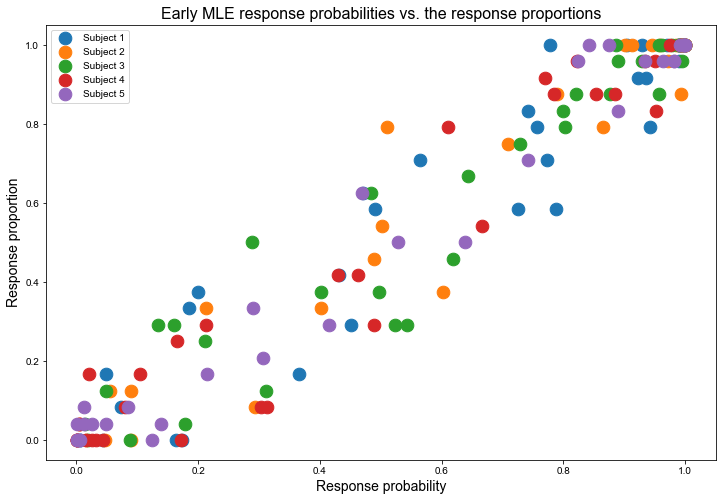

In [4]:
# define stuff to plot
x = p_set
y = list(data/24)

# plot FLMP response probabilities vs. response proportions
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
for idx in range(len(x)):
    ax1.scatter(x[idx], y[idx], s=160, label=f'Subject {idx+1}')
plt.legend(loc='upper left')
plt.title("Early MLE response probabilities vs. the response proportions", fontsize=16)
plt.xlabel('Response probability', fontsize=14)
plt.ylabel('Response proportion', fontsize=14)
sns.set_style("whitegrid")
plt.savefig('./visualizations/mle_scatter.png', transparent=True)
plt.show()